## Dynamic Visualization of Rolling Two Dice

Code repo: https://github.com/mannyjrod/Dynamic_visualization_of_rolling_two_dice

Author: Emmanuel Rodriguez

Date: 20 Jan 2024

Location: Renton, Seattle, WA

[emmanueljrodriguez.com/](https://emmanueljrodriguez.com/)

### Visualizing Die-Roll Frequencies and Percentages

Ref: Deitel, P., & Deitel, H. (2020). Intro to Python for Computer Science and Data Science. Harlow, UK: Pearson Education.
- Section 5.17.2

In [2]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

In [4]:
# Roll the die and calculate die frequencies
rolls = [random.randrange(1, 7) for i in range(600)] # List comprehension to create a list of 600 random die values

values, frequencies = np.unique(rolls, return_counts=True) # Note: Numpy will convert the list to an ndarray for better performance

* `return_counts=True` tells `unique` to count each unique value's number of occurrences

* `unique` returns a *tuple* of two one-dimensional `ndarrays` containing the sorted unique values and the corresponding frequencies

- Unpack the tuple's `ndarray`s into the variables `values` and `frequencies`

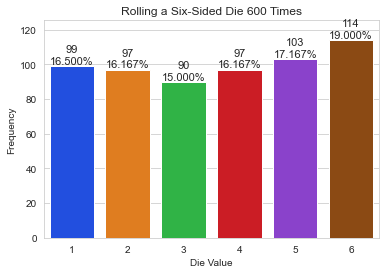

In [11]:
# Create initial bar plot
title = f'Rolling a Six-Sided Die {len(rolls):,} Times'
sns.set_style('whitegrid')
axes = sns.barplot(x=values, y=frequencies, palette='bright')
axes.set_title(title)
axes.set(xlabel='Die Value', ylabel='Frequency')

# Finalize the bar plot
axes.set_ylim(top=max(frequencies)*1.10) # Scale the y-axis by 10% to make room for the text above

# Display each bar's frequency value and percentage of the total rolls
for bar, frequency in zip(axes.patches, frequencies): # The for loop uses the zip object to iterate through axes.patches 
    # (collection contains two-dimensional colored shapes that represent the plot's bars), and their corresponding 
    # frequency values. Each iteration outputs a tuple, one from 'axes.patches' which is appended to the 'bar' argument, 
    # and the second from 'frequencies' which is appended to the 'frequency' argument.
    
    text_x = bar.get_x() + bar.get_width()/2.0 # Calc the center x-coordinate where the text will appear.
    text_y = bar.get_height() # Get the y-coordinate where the text will appear.
    text = f'{frequency:,}\n{frequency / len(rolls):.3%}' # Create a two-line string containing the bar's frequency and corresponding %
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom') # Call the 'axes' object's 'text' method to display the text above the bar.

In [17]:
axes.set_ylim?

In [19]:
zip?

### Roll Again and Update the Bar Plot

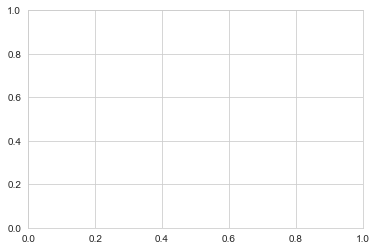

In [21]:
# Clear existing graph
plt.cla()

In [22]:
%recall 4 # Gets previous snippet

In [23]:
# Roll the die and calculate die frequencies
rolls = [random.randrange(1, 7) for i in range(60000)] # List comprehension to create a list of 60000 random die values

In [24]:
values, frequencies = np.unique(rolls, return_counts=True) # Note: Numpy will convert the list to an ndarray for better performance

In [25]:
%recall 11

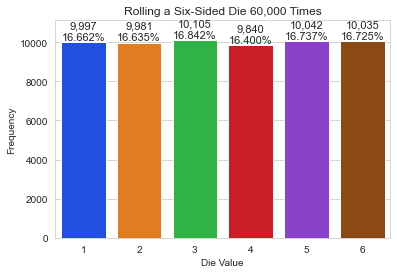

In [26]:
# Create initial bar plot
title = f'Rolling a Six-Sided Die {len(rolls):,} Times'
sns.set_style('whitegrid')
axes = sns.barplot(x=values, y=frequencies, palette='bright')
axes.set_title(title)
axes.set(xlabel='Die Value', ylabel='Frequency')

# Finalize the bar plot
axes.set_ylim(top=max(frequencies)*1.10)

for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x() + bar.get_width()/2.0
    text_y = bar.get_height()
    text = f'{frequency:,}\n{frequency / len(rolls):.3%}'
    axes.text(text_x, text_y, text, fontsize=11, ha='center', va='bottom')

In [27]:
# Use %save magic to save snippets 1 - 26 to a file named RollDie.py
%save RollDie.py 1-26

The following commands were written to file `RollDie.py`:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
# Roll the die and calculate die frequencies
rolls = [random.randrange(1, 7) for i in range(600)] # List comprehension to create a list of 600 random die values

values, frequencies = np.unique(rolls, return_counts=True) # Note: Numpy will convert the list to an ndarray for better performance
# Roll the die and calculate die frequencies
rolls = [random.randrange(1, 7) for i in range(600)] # List comprehension to create a list of 600 random die values

values, frequencies = np.unique(rolls, return_counts=True) # Note: Numpy will convert the list to an ndarray for better performance
# Create initial bar plot
title = f'Rolling a Six-Sided Die {len(rolls):,} Times'

sns.set_style('whitegrid')

axes = sns.barplot(x=values, y=frequencies, palette='brig

In [28]:
#axes.patches

### Dynamic Visualization

**Dynamically graphing frequencies of die rolls.**

Use the Matplotlib **animation** module's `FuncAnimation` function to update visualization dynamically.

- `FuncAnimation` drives a frame-by-frame animation, each animation frame specifies everything that should change during one plot update.

Each animation frame will:

* roll the dice a specified number of times (from 1 to as many as you'd like), updating die frequencies with each roll,
* clear the current plot,
* create a new set of bars representing the updated frequencies, and
* create new frequency and percentage text for each bar.

Ref. Deitel, section 6.4.2

In [1]:
from matplotlib import animation
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys # System-specific parameters and functions. The module provides access to some variables used or maintained by
# the interpreter and to functions that interact strongly with the interpreter.

In [2]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [ ]:
# Initialize figure object
fig = plt.figure()



In [5]:
# Animation function - Define a function for rolling the die and updating the 'frequencies' list
def update(frame_number, rolls, faces, frequencies):
    
    # Roll die and update frequencies
    for i in range(rolls):
        frequencies[random.randrange(1,7)-1] += 1 # Subtract 1 from the die value (1 through 6) before incrementing the
        # corresponding `frequencies` element
        
        # Reconfigure plot for updated die frequencies
        plt.cla() # Clear old contents of current figure
        axes = sns.barplot(faces, frequencies, palette='bright') # New bars
        axes.set_title(f'Die Frequencies for {sum(frequencies):,} Rolls')
        axes.set(xlabel='Die Value', ylabel='Frequency')
        axes.set_ylim(top=max(frequencies)*1.10) # Scale y-axis by 10%
        
        # Display frequency & percentage above each patch (bar)
        for bar, frequency in zip(axes.patches, frequencies):
            text_x = bar.get_x() + bar.get_width()/2.0
            text_y = bar.get_height()
            text = f'{frequency:,}\n{frequency/sum(frequencies):.3%}'
            axes.text(text_x, text_y, text, ha='center', va='bottom')
            
            # Configure the graph and maintain state
            # Read command-line arguments for number of frames and rolls per frame
            number_of_frames = int(sys.argv[1])
            rolls_per_frame = int(sys.argv[2])
            
#             sns.set_style('whitegrid') # White background with gray grid lines
#             figure = plt.figure('Rolling a Six-Sided Die') # Figure animation
#             values = list(range(1, 7)) # Die faces for display on x-axis
#             frequencies = [0]*6 # Six-element list of die frequencies
            
# #             return line,
# #         return line,
# #     return line,
        
#             # Call the `animation` Module's `FuncAnimation` Function
#             # Configure and start animation that calls function update
#             die_animation = animation.FuncAnimation(
#                 figure, update, repeat=False, frames=number_of_frames, interval=33,
#                 fargs=(rolls_per_frame, values, frequencies))
            
#             # `FuncAnimation` has two required arguments: figure - the Figure object in which to display the animation
#             # update - the function to call once per animation frame.
#             video = anim.to_html5_video()
#             html = display.HTML(video)
#             display.display(html)
#             plt.close()
            
# #             plt.show() # Display window
            
#             # Save the animation
# #             die_animation.save('RollingTwoDice.mp4', writer='ffmpeg', fps=30)

In [4]:
# %recall 3

In [8]:
# # Animation function - Define a function for rolling the die and updating the 'frequencies' list
# def update(frame_number, rolls, faces, frequencies):
    
#     # Roll die and update frequencies
#     for i in range(rolls):
#         frequencies[random.randrange(1,7)-1] += 1 # Subtract 1 from the die value (1 through 6) before incrementing the
#         # corresponding `frequencies` element
        
#         # Reconfigure plot for updated die frequencies
#         plt.cla() # Clear old contents of current figure
#         axes = sns.barplot(faces, frequencies, palette='bright') # New bars
#         axes.set_title(f'Die Frequencies for {sum(frequencies):,} Rolls')
#         axes.set(xlabel='Die Value', ylabel='Frequency')
#         axes.set_ylim(top=max(frequencies)*1.10) # Scale y-axis by 10%
        
#         # Display frequency & percentage above each patch (bar)
#         for bar, frequency in zip(axes.patches, frequencies):
#             text_x = bar.get_x() + bar.get_width()/2.0
#             text_y = bar.get_height()
#             text = f'{frequency:,}\n{frequency/sum(frequencies):.3%}'
#             axes.text(text_x, text_y, text, ha='center', va='bottom')
            
#             # Configure the graph and maintain state
#             # Read command-line arguments for number of frames and rolls per frame
#             number_of_frames = int(sys.argv[1])
#             rolls_per_frame = int(sys.argv[2])
            
sns.set_style('whitegrid') # White background with gray grid lines
figure = plt.figure('Rolling a Six-Sided Die') # Figure animation
values = list(range(1, 7)) # Die faces for display on x-axis
frequencies = [0]*6 # Six-element list of die frequencies
            
#             return line,
#         return line,
#     return line,
        
# # Call the `animation` Module's `FuncAnimation` Function
# # Configure and start animation that calls function update
# die_animation = animation.FuncAnimation(figure, update, repeat=False, frames=number_of_frames, interval=33,
#                                         fargs=(rolls_per_frame, values, frequencies))
            
# # `FuncAnimation` has two required arguments: figure - the Figure object in which to display the animation
# # update - the function to call once per animation frame.
# video = anim.to_html5_video()
# html = display.HTML(video)
# display.display(html)
# plt.close()
            
# #             plt.show() # Display window
            
#             # Save the animation
# #             die_animation.save('RollingTwoDice.mp4', writer='ffmpeg', fps=30)

<Figure size 432x288 with 0 Axes>

C:\Users\ejoaq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: invalid literal for int() with base 10: '-f'

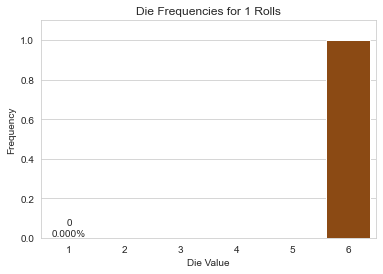

In [12]:
# Call the `animation` Module's `FuncAnimation` Function
# Configure and start animation that calls function update
die_animation = animation.FuncAnimation(figure, update, repeat=False, frames=200, interval=33,
                                        fargs=(100, values, frequencies))
            
# `FuncAnimation` has two required arguments: figure - the Figure object in which to display the animation
# update - the function to call once per animation frame.
video = die_animation.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
            
#             plt.show() # Display window
            
            # Save the animation
#             die_animation.save('RollingTwoDice.mp4', writer='ffmpeg', fps=30)